### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [92]:
import warnings 
warnings.filterwarnings('ignore')

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [94]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [95]:
# Load CSV using Pandas
filename = 'vehicle.csv'
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df_1 = pd.read_csv(filename, sep=',')
print(df_1.shape)

(846, 19)


In [96]:
df_1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [97]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [98]:
df = df_1.copy()

In [99]:
print(df.head())

   compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0            

In [100]:
# descriptions
print(df.describe(include='all').transpose())

                            count unique  top freq     mean      std  min  \
compactness                   846    NaN  NaN  NaN  93.6785  8.23447   73   
circularity                   841    NaN  NaN  NaN  44.8288  6.15217   33   
distance_circularity          842    NaN  NaN  NaN  82.1105  15.7783   40   
radius_ratio                  840    NaN  NaN  NaN  168.888  33.5202  104   
pr.axis_aspect_ratio          844    NaN  NaN  NaN  61.6789  7.89146   47   
max.length_aspect_ratio       846    NaN  NaN  NaN  8.56738  4.60122    2   
scatter_ratio                 845    NaN  NaN  NaN  168.902  33.2148  112   
elongatedness                 845    NaN  NaN  NaN  40.9337  7.81619   26   
pr.axis_rectangularity        843    NaN  NaN  NaN  20.5824  2.59293   17   
max.length_rectangularity     846    NaN  NaN  NaN  147.999  14.5157  118   
scaled_variance               843    NaN  NaN  NaN  188.631   31.411  130   
scaled_variance.1             844    NaN  NaN  NaN  439.494  176.667  184   

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

  class  count      prop
0   car    429  0.507092
1   bus    218  0.257683
2   van    199  0.235225


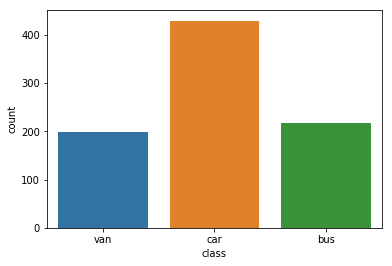

In [101]:
## Target Variable Frequency Distribution
freq = df['class'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
import seaborn as sns
sns.countplot(df['class'])
plt.show()

In [102]:
# Convert Class Veriable Object to Numeric

df['class'] = pd.factorize(df['class'])[0]# status distribution

In [103]:
print(df.groupby('class').size())

class
0    199
1    429
2    218
dtype: int64


### Check for any missing values in the data 

In [104]:
# find missing value is any
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [105]:
import numpy as np
df['circularity'] = df['circularity'].replace(np.NaN, df['circularity'].median())

In [106]:
df['distance_circularity'] = df['distance_circularity'].replace(np.NaN, df['distance_circularity'].median())
df['radius_ratio'] = df['radius_ratio'].replace(np.NaN, df['radius_ratio'].median())
df['pr.axis_aspect_ratio'] = df['pr.axis_aspect_ratio'].replace(np.NaN, df['pr.axis_aspect_ratio'].median())
df['scatter_ratio'] = df['distance_circularity'].replace(np.NaN, df['distance_circularity'].median())
df['elongatedness'] = df['elongatedness'].replace(np.NaN, df['elongatedness'].median())
df['pr.axis_rectangularity'] = df['pr.axis_rectangularity'].replace(np.NaN, df['pr.axis_rectangularity'].median())
df['scaled_variance'] = df['scaled_variance'].replace(np.NaN, df['scaled_variance'].median())
df['scaled_variance.1'] = df['scaled_variance.1'].replace(np.NaN, df['scaled_variance.1'].median())
df['scaled_radius_of_gyration'] = df['scaled_radius_of_gyration'].replace(np.NaN, df['scaled_radius_of_gyration'].median())
df['scaled_radius_of_gyration.1'] = df['scaled_radius_of_gyration.1'].replace(np.NaN, df['scaled_radius_of_gyration.1'].median())
df['skewness_about'] = df['skewness_about'].replace(np.NaN, df['skewness_about'].median())
df['skewness_about.1'] = df['skewness_about.1'].replace(np.NaN, df['skewness_about.1'].median())
df['skewness_about.2'] = df['skewness_about.2'].replace(np.NaN, df['skewness_about.2'].median())

In [108]:
# find missing value for cross verification
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3. Standardize the data 

In [109]:
# Copy all the predictor variables into X dataframe. Since 'class' is dependent variable drop it
X = df.drop('class', axis=1)

# Copy the 'class' column alone into the y dataframe. This is the dependent variable
y = df[['class']]


In [110]:
from sklearn import preprocessing

# scale all the columns of the df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

In [111]:
#from scipy.stats import zscore

#df_z = X.apply(zscore)

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [113]:
y_test.head()

,class
693,0
375,2
185,2
464,2
709,1


### K - Means Clustering

### 4. Assign a dummy array called distortion

In [114]:
distortion = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [115]:
from scipy.spatial import distance
cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
distortion = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X_scaled)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  distortion.append( sum(np.min(distance.cdist(X_scaled,clusters.cluster_centers_,'euclidean'),axis=1))/X_scaled.shape[0] )    # capture the intertia
  #cluster_sil_scores.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))






# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "distortion": distortion  } )
clusters_df[0:15]

,distortion,num_clusters
0,2.988766,2
1,2.657616,3
2,2.566477,4
3,2.443535,5
4,2.339777,6
5,2.264437,7
6,2.209305,8
7,2.133665,9


Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

In [116]:
# Elbow plot

plt.figure(figsize=(12,6))

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

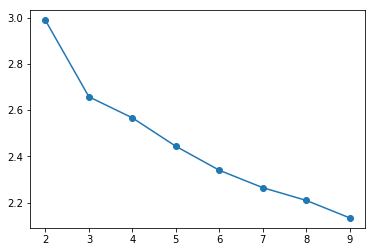

In [117]:
plt.plot( clusters_df.num_clusters, clusters_df.distortion, marker = "o" )

### Find out the optimal value of K

In [118]:
# The elbow plot shows that 3 might be a good choice for K and it seems logical given we know there are 3 qualities of Class

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [119]:
cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [120]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[-9.52680970e-01, -5.50850363e-01, -9.42800663e-01,
        -1.10349404e+00, -5.25689648e-01, -2.42755880e-01,
        -9.42800663e-01,  8.95510807e-01, -7.58923854e-01,
        -5.25854303e-01, -8.04752391e-01, -7.95228067e-01,
        -4.10802114e-01,  8.71569711e-01, -8.16269084e-02,
        -2.81812236e-01, -1.08921580e+00, -1.15598975e+00],
       [ 1.13943103e+00,  1.16267924e+00,  1.20085204e+00,
         1.01384610e+00,  2.02699270e-01,  3.42953087e-01,
         1.20085204e+00, -1.19488245e+00,  1.27602164e+00,
         1.09763062e+00,  1.21879609e+00,  1.27882484e+00,
         1.07615879e+00, -1.47272763e-02,  1.78627206e-01,
         2.66759295e-01, -5.89548127e-04,  1.76982742e-01],
       [-2.45649121e-01, -5.40978179e-01, -3.01090602e-01,
        -4.22796092e-02,  2.01783766e-01, -1.04251325e-01,
        -3.01090602e-01,  3.28953726e-01, -4.87327675e-01,
        -5.06699430e-01, -4.10434407e-01, -4.64528183e-01,
        -5.68986445e-01, -5.88980990e-01, -8.51818833e

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [121]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(X_scaled) )
centroid_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.952681,-0.550850,-0.942801,-1.103494,-0.525690,-0.242756,-0.942801,0.895511,-0.758924,-0.525854,-0.804752,-0.795228,-0.410802,0.871570,-0.081627,-0.281812,-1.089216,-1.155990
1,1.139431,1.162679,1.200852,1.013846,0.202699,0.342953,1.200852,-1.194882,1.276022,1.097631,1.218796,1.278825,1.076159,-0.014727,0.178627,0.266759,-0.000590,0.176983
2,-0.245649,-0.540978,-0.301091,-0.042280,0.201784,-0.104251,-0.301091,0.328954,-0.487328,-0.506699,-0.410434,-0.464528,-0.568986,-0.588981,-0.085182,-0.017006,0.751099,0.656517


Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [123]:
cluster.labels_

array([2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 1, 2, 0, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2,
       1, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 0,
       2, 0, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2,
       2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2,
       2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 0, 1, 0, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0, 1, 0,
       0, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 2, 0, 1, 0, 2,
       1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 2, 2,
       0, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2,
       1, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 2,
       2, 2, 1, 0, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1,

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [151]:
import pandas as pd
import numpy as np

In [152]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [153]:
a = pd.DataFrame(a)
b = pd.DataFrame(b)
c = pd.DataFrame(c)

### 9. Combine all three arrays a,b,c into a dataframe

In [168]:
df_h = pd.concat([a, b, c])

In [169]:
print(df_h.head())

           0         1
0   8.382681  0.801302
1   9.072015 -1.133030
2  10.483618 -0.310925
3  10.539513 -2.023040
4  10.208462  1.421556


In [170]:
df_h.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000155E4F43400>,
      dtype=object)

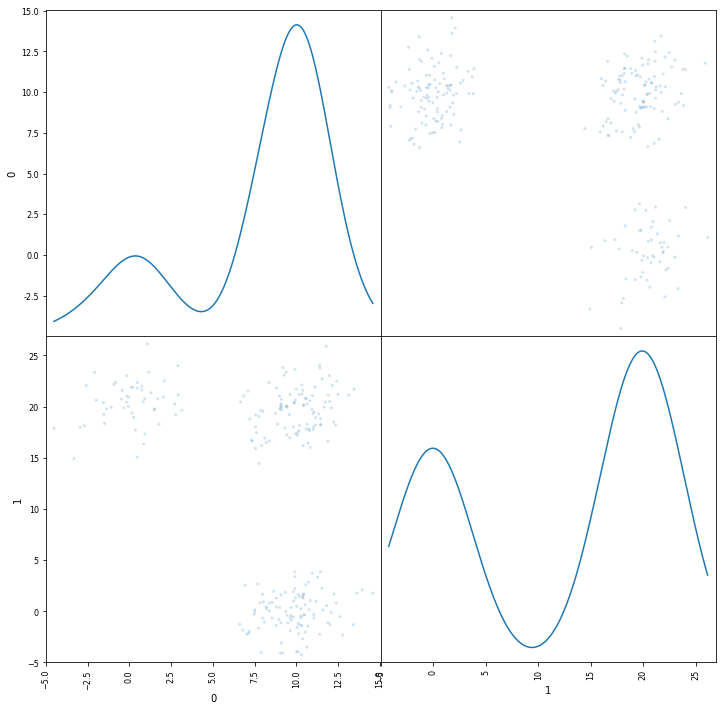

In [171]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_h, alpha = 0.2, figsize = (12, 12), diagonal = 'kde')

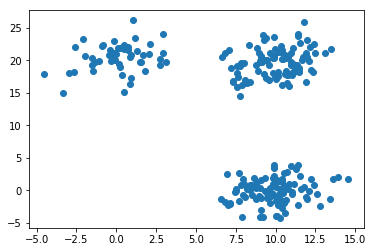

In [172]:
plt.scatter(df_h[0], df_h[1])

### 11. Find out the linkage matrix

In [173]:
from sklearn.cluster import AgglomerativeClustering

Use ward as linkage metric and distance as Eucledian

In [181]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [182]:
model.fit(df_h)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func='deprecated')

In [183]:
df_h['labels'] = model.labels_
df_h.groupby(["labels"]).count()

,0,1
labels,,
0,100,100
1,100,100
2,50,50


In [187]:
#import scipy

#scipy.cluster.hierarchy.linkage
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

Z = linkage(df_h, 'ward')
c, coph_dists = cophenet(Z , pdist(df_h))

c

0.9534992487771534

In [188]:
Z.shape

Z[1]
Z[1:10]

array([[1.56000000e+02, 2.17000000e+02, 6.28080437e-02, 2.00000000e+00],
       [1.50000000e+02, 1.55000000e+02, 6.82741505e-02, 2.00000000e+00],
       [1.70000000e+02, 1.72000000e+02, 7.59896324e-02, 2.00000000e+00],
       [2.40000000e+01, 3.30000000e+01, 8.05364276e-02, 2.00000000e+00],
       [1.69000000e+02, 2.19000000e+02, 9.26518723e-02, 2.00000000e+00],
       [2.00000000e+00, 2.50000000e+01, 9.46828751e-02, 2.00000000e+00],
       [5.10000000e+01, 5.80000000e+01, 9.58946104e-02, 2.00000000e+00],
       [2.18000000e+02, 2.53000000e+02, 1.04351002e-01, 3.00000000e+00],
       [1.62000000e+02, 2.22000000e+02, 1.10233489e-01, 2.00000000e+00]])

### 12. Plot the dendrogram for the consolidated dataframe

In [189]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

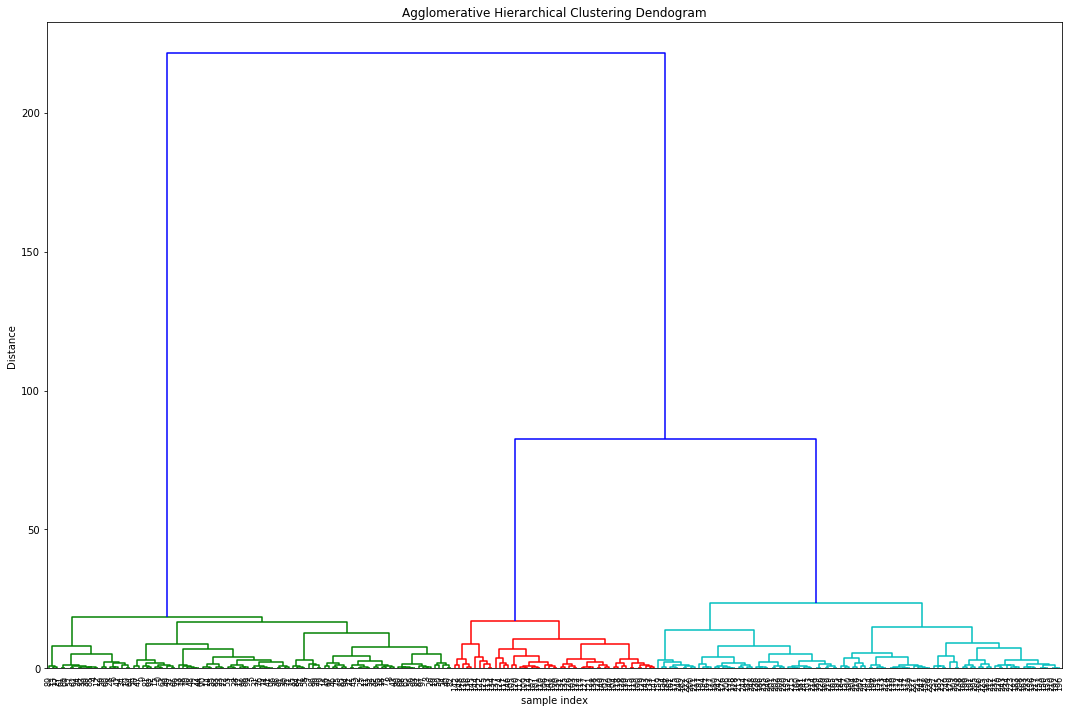

In [190]:
plt.figure(figsize=(15, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

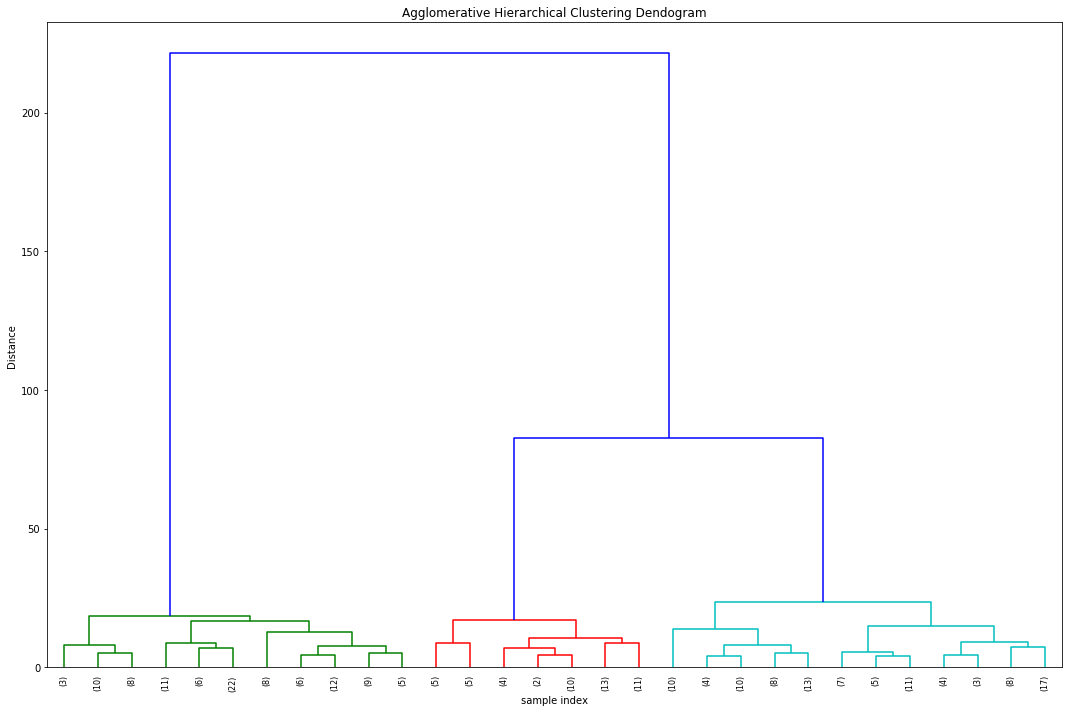

In [191]:
plt.figure(figsize=(15, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 30, leaf_font_size=8. , truncate_mode='lastp' )
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [192]:
max_t = 50

In [193]:
from scipy.cluster.hierarchy import fcluster

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [194]:
cluster = fcluster(Z, max_t, criterion='distance')
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

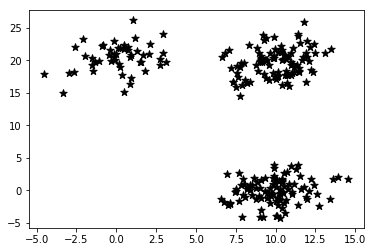

In [195]:
plt.scatter(df_h[0], df_h[1], s=60, c='black', marker='*')